## First Neurons

In [12]:
import tensorflow as tf
import numpy as np

In [13]:
#first we create placeholders
ph1=tf.placeholder(tf.int32)
ph2=tf.placeholder(tf.int32)
#we created two empty node

In [14]:
#now we create input value to send the placeholder 
num1=10
num2=20

In [15]:
#now we set the operations
add=ph1+ph2
sub=ph1-ph2
mul=ph1*ph2

In [16]:
#use session to excute this network
with tf.Session() as sess:
    add_result = sess.run(add,feed_dict={ph1:num1,ph2:num2}) #placeholder feed the data from input values
    print(add_result)
    
    print('\n')
    
    sub_result = sess.run(sub,feed_dict={ph1:num1,ph2:num2})
    print(sub_result)
    
    print('\n')
    
    mult_result = sess.run(mul,feed_dict={ph1:num1,ph2:num2})
    print(mult_result)

30


-10


200


## use random data in neural networks

In [17]:
rand1=np.random.uniform(0,100,(5,5))
rand1

array([[70.63119564, 93.94908067, 95.07793237,  9.3843041 ,  6.49712556],
       [86.26510771,  2.54239069,  2.52678834, 62.13875055, 17.20749015],
       [ 6.66968197, 95.80762802, 24.35390708, 42.1227154 , 56.98482177],
       [25.23573644, 13.90463718, 28.56570421, 31.97053753,  1.11304011],
       [ 4.34277039, 23.17984518, 90.9533107 , 31.55634697, 48.45711729]])

In [18]:
rand2=np.random.uniform(0,100,(5,5))
rand2

array([[ 8.16941067, 20.43401104, 30.23006598, 56.94042606,  5.61560514],
       [69.02376409, 43.37583581,  9.48919925, 43.2654284 , 73.77830817],
       [69.6835031 , 75.59976036, 36.32176245, 95.75459728, 95.37579131],
       [79.60018363, 51.93076065, 57.19531638,  2.14713991, 28.283291  ],
       [76.24422255, 79.74038019, 57.8566991 , 12.85018483, 25.15143827]])

In [19]:
np.random.seed(101)  #  seed used for same random value for each excution
rand1=np.random.uniform(0,100,(5,5))
rand2=np.random.uniform(0,100,(5,5))
#this is input values

In [20]:
#create placeholders

ph1=tf.placeholder(tf.float32)
ph2=tf.placeholder(tf.float32)

In [21]:
#set the operation

add=ph1+ph2
mul=ph1*ph2

In [22]:
#create session to execute the operation

with tf.Session() as sess:
    print(sess.run(add,feed_dict={ph1:rand1,ph2:rand2}))
    print("\n")
    print(sess.run(mul,feed_dict={ph1:rand1,ph2:rand2}))

[[151.07166  109.1333    60.726376  90.63407  122.72388 ]
 [174.70505  111.48864  129.66109  107.87682  114.28157 ]
 [ 89.78592  121.723175 101.21701  132.37631  188.79526 ]
 [ 32.950016  18.640892 130.50557  161.94727   43.57991 ]
 [ 96.08789  119.035904  21.278767  83.92404   67.460266]]


[[5134.644    2971.2686    164.80583  1260.3738   3713.9392  ]
 [7614.759    2480.042    3601.2412   2577.5305   1809.884   ]
 [1904.5011   3046.2927   1510.212    4227.8057   8906.287   ]
 [ 225.72342    85.940834 4233.936    6491.534     440.7675  ]
 [1888.5161   3482.615      79.661606  966.97504   911.71906 ]]


## Example neural networks

In [23]:
n_features=10
n_neurons=5

neural networks are

x=input
w=weight
b=bias value

z=wx+b

In [24]:
x=tf.placeholder(tf.float32,shape=(None,n_features))

In [25]:
w=tf.Variable(tf.random_normal([n_features,n_neurons]))

In [26]:
b=tf.Variable(tf.zeros([n_neurons]))

In [27]:
#perform the network operation

In [28]:
wx=tf.matmul(x,w)

In [29]:
z=tf.add(wx,b)

In [30]:
act=tf.sigmoid(z)  #activation funtion

In [31]:
#now we are execute the operation

init=tf.global_variables_initializer()

In [32]:
with tf.Session() as sess:
    sess.run(init)
    five_neuron_out= sess.run(act,feed_dict={x:np.random.random([1,n_features])})

In [33]:
print(five_neuron_out)

[[0.9126066  0.10836768 0.45112926 0.50096637 0.46980196]]


## Full neural networks

In [34]:
#full neural network with regression data

y=mx+c

In [38]:
x_data=np.linspace(0,10,10)+np.random.uniform(-0.5,0.5,10) # feature data

In [39]:
y_data=np.linspace(0,10,10)+np.random.uniform(-0.5,0.5,10)  #label data

In [40]:
from matplotlib import pyplot as plt
%matplotlib inline

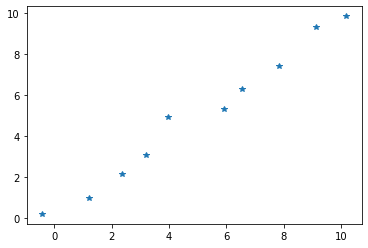

In [41]:
plt.plot(x_data,y_data,"*")

In [42]:
#we initialize variable

y=mx+c

In [43]:
m=tf.Variable(0.5)
c=tf.Variable(0.4)

## cost function

In [44]:
#find the errors
error=0

for x,y in zip(x_data,y_data):
    y_pred=m*x+c
    error+=(y-y_pred)**2

In [45]:
#reduce the error by optimizer
opt=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=opt.minimize(error)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [46]:
# execute all the operation

In [47]:
init=tf.global_variables_initializer()

In [48]:
with tf.Session()as sess:
    sess.run(init)
    
    epochs=100
    for i in range(epochs):
        sess.run(train)
    best_m,best_c=sess.run([m,c])

In [49]:
best_m

0.9323711

In [50]:
best_c

0.34350824

In [51]:
x_test=np.linspace(-1,11,10)
y_pred=best_m*x_test+best_c

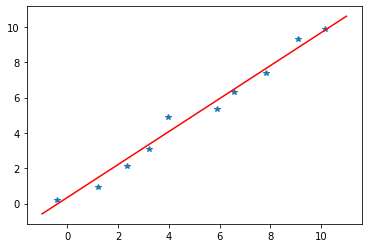

In [52]:
plt.plot(x_data,y_data,"*")
plt.plot(x_test,y_pred,"red")